<a href="https://colab.research.google.com/github/Sirayus/colab-notebook/blob/main/2021MAY17_EDA_rotten_tomatoes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA Rotten Tomatoes dataset version_1

In [3]:
import numpy as np
import pandas as pd

In [4]:
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
!pip install kaggle

from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d stefanoleone992/rotten-tomatoes-movies-and-critic-reviews-dataset	# copy from dataset you want to use

!ls

Saving kaggle.json to kaggle.json
 95% 73.0M/77.2M [00:01<00:00, 41.9MB/s]
100% 77.2M/77.2M [00:02<00:00, 40.1MB/s]
kaggle.json  rotten-tomatoes-movies-and-critic-reviews-dataset.zip  sample_data


In [6]:
import zipfile
zip_ref = zipfile.ZipFile("rotten-tomatoes-movies-and-critic-reviews-dataset.zip", "r") # Don't forget to change file name to zip
zip_ref.extractall("files")
zip_ref.close()

In [7]:
review = pd.read_csv('/content/files/rotten_tomatoes_critic_reviews.csv')
film = pd.read_csv('/content/files/rotten_tomatoes_movies.csv')

## Transform Data

In [11]:
film['original_release_date'].astype(str).apply(lambda x: x[8:10])

0        12
1        30
2        05
3        13
4        01
         ..
17707    02
17708    04
17709    17
17710    17
17711    14
Name: original_release_date, Length: 17712, dtype: object

In [12]:
film['original_release_year'] = film['original_release_date'].astype(str).apply(lambda x: x[:4])
film['original_release_month'] = film['original_release_date'].astype(str).apply(lambda x: x[5:7])
film['original_release_dom'] = film['original_release_date'].astype(str).apply(lambda x: x[8:10])
film['genre_1'] = film['genres'].str.split(', ', expand=True)[0]

In [13]:
film['genres'].str.split(', ', expand=True)[0]

0        Action & Adventure
1                    Comedy
2                    Comedy
3                  Classics
4        Action & Adventure
                ...        
17707                 Drama
17708    Action & Adventure
17709    Action & Adventure
17710              Classics
17711    Action & Adventure
Name: 0, Length: 17712, dtype: object

## Explore Data

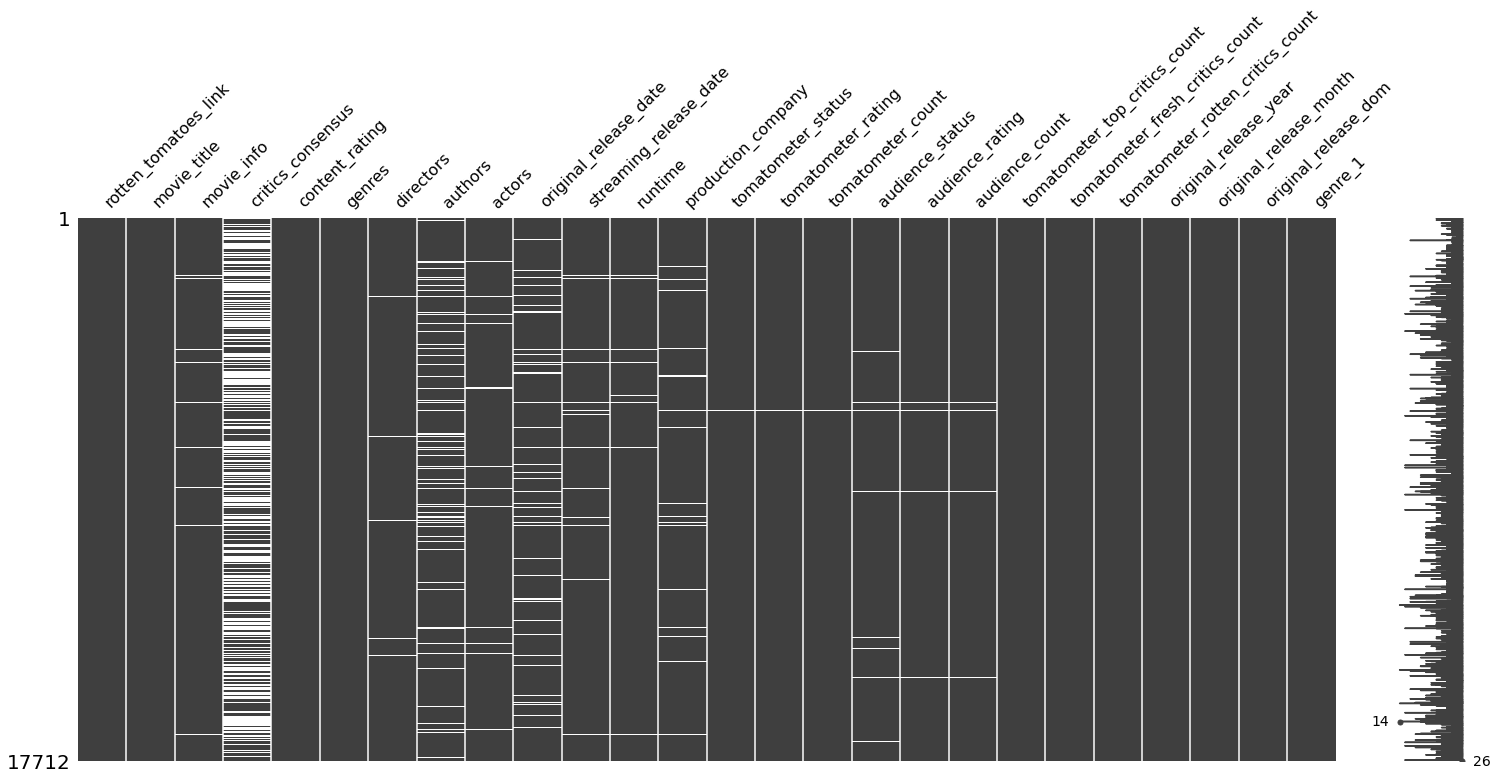

In [14]:
msno.matrix(film)

In [15]:
film.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17712 entries, 0 to 17711
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   rotten_tomatoes_link              17712 non-null  object 
 1   movie_title                       17712 non-null  object 
 2   movie_info                        17391 non-null  object 
 3   critics_consensus                 9134 non-null   object 
 4   content_rating                    17712 non-null  object 
 5   genres                            17693 non-null  object 
 6   directors                         17518 non-null  object 
 7   authors                           16170 non-null  object 
 8   actors                            17360 non-null  object 
 9   original_release_date             16546 non-null  object 
 10  streaming_release_date            17328 non-null  object 
 11  runtime                           17398 non-null  float64
 12  prod

In [16]:
film.head()

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,streaming_release_date,runtime,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,original_release_year,original_release_month,original_release_dom,genre_1
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2015-11-25,119.0,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76,2010,02,12,Action & Adventure
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2012-09-04,90.0,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19,2010,04,30,Comedy
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,2014-07-24,122.0,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8,1979,10,05,Comedy
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,2017-01-13,95.0,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0,1957,04,13,Classics
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,2016-06-10,127.0,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3,1954,01,01,Action & Adventure


## Histogram of Rating

(array([  39.,  361., 1021., 1770., 2262., 2437., 2716., 3043., 2785.,
         982.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

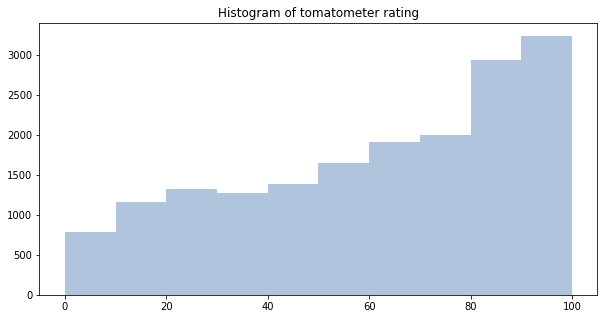

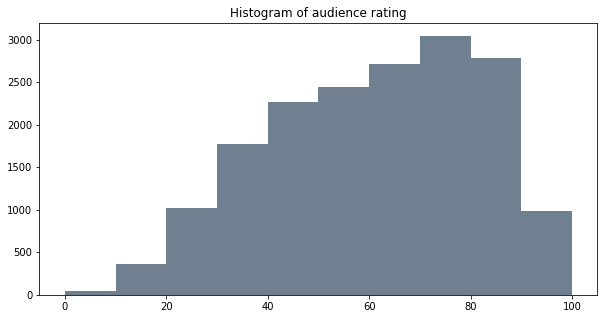

In [17]:
plt.figure( figsize=(10,5))
plt.title('Histogram of tomatometer rating')
plt.hist(film['tomatometer_rating'], bins = 10, histtype='bar', color='lightsteelblue')

plt.figure( figsize=(10,5))
plt.title('Histogram of audience rating')
plt.hist(film['audience_rating'], bins = 10, histtype='bar', color='slategrey')

> It seems that both rating (when plot in histogram) have negative skew distribution

## Histogram of runtime

Text(0.5, 1.0, 'Histogram of runtime')

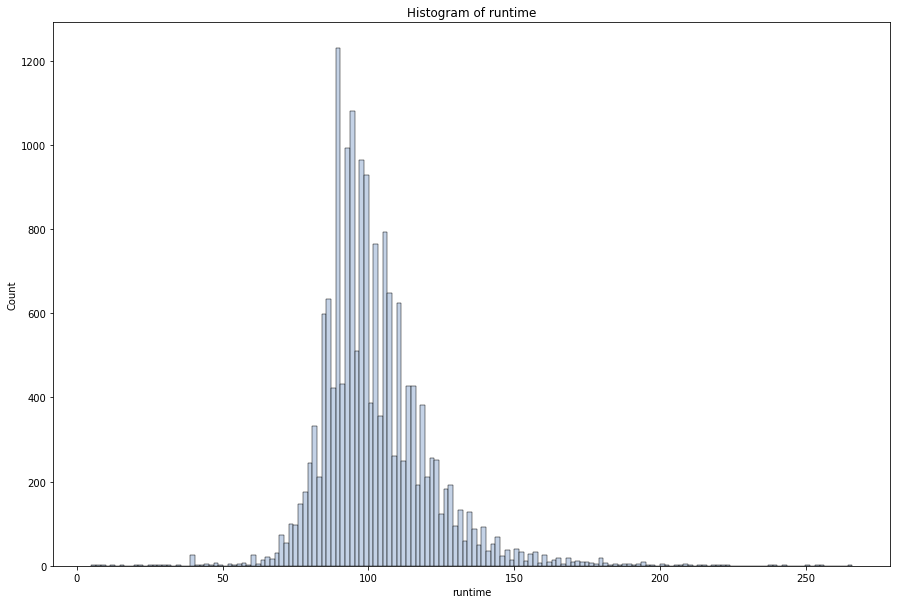

In [18]:
plt.figure(figsize=(15,10))
sns.histplot(data=film, x=film['runtime']
#              , bins=20
             , palette='Purples'
            ,color='lightsteelblue')
plt.title('Histogram of runtime')

## Count plot of Content Rating/ Tomatometer Status/ Audience Status

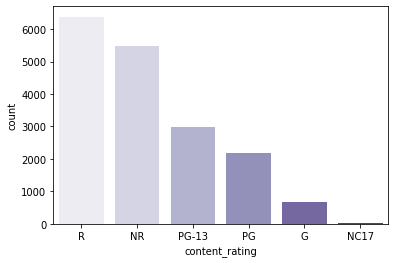

In [19]:
sns.countplot(data=film, x='content_rating'
              , palette='Purples'
              , order=film['content_rating'].value_counts().index)

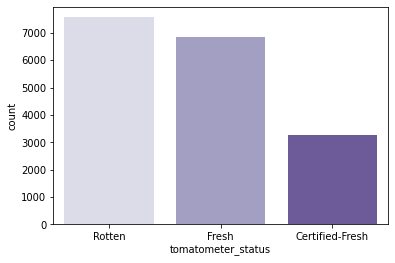

In [20]:
sns.countplot(data=film, x='tomatometer_status'
              , palette='Purples'
             , order=film['tomatometer_status'].value_counts().index)

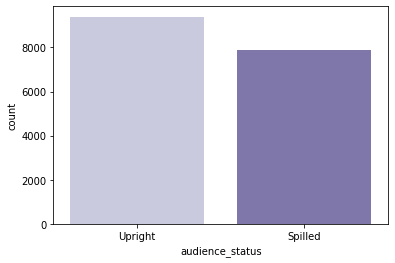

In [21]:
sns.countplot(data=film, x='audience_status'
              , palette='Purples'
             , order= film['audience_status'].value_counts().index)

## Relation between Tomatometer Rating and Audience Rating 

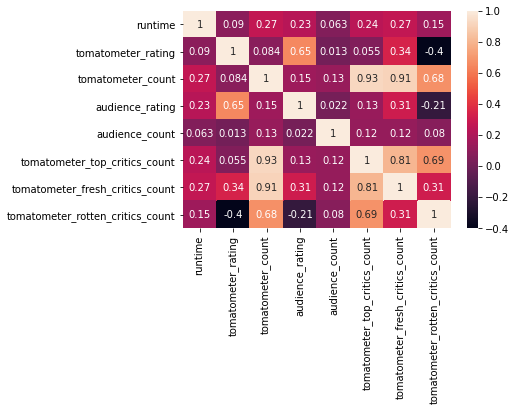

In [22]:
corr = film.corr()
sns.heatmap(corr, annot=True)

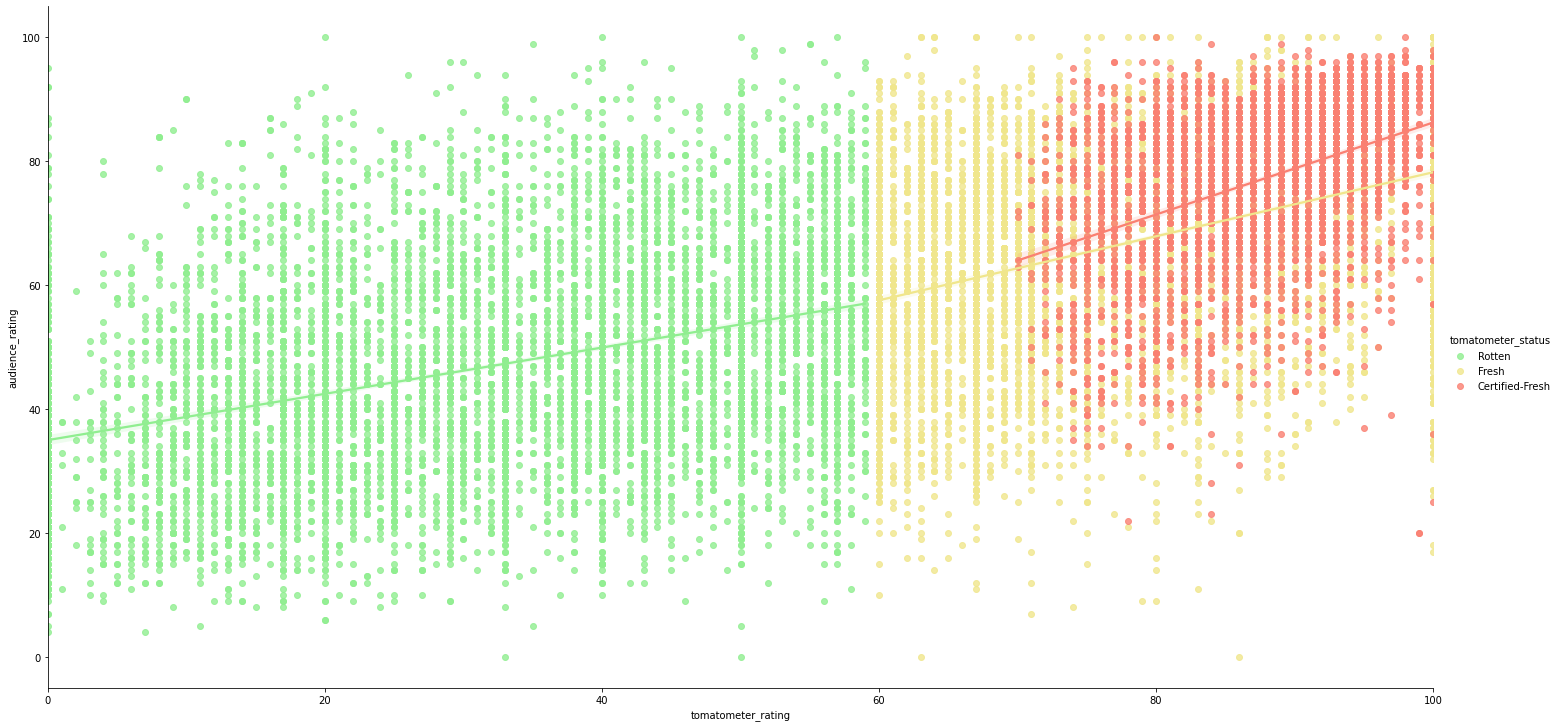

In [23]:
g = sns.lmplot(
    data=film,
    x='tomatometer_rating', y='audience_rating', hue="tomatometer_status", height=10, aspect=2, palette=['lightgreen', 'khaki', 'salmon'], hue_order=['Rotten', 'Fresh', 'Certified-Fresh'])

## Number of Films throughout years

Text(0.5, 1.0, 'Number of films through out 1914 : 2020')

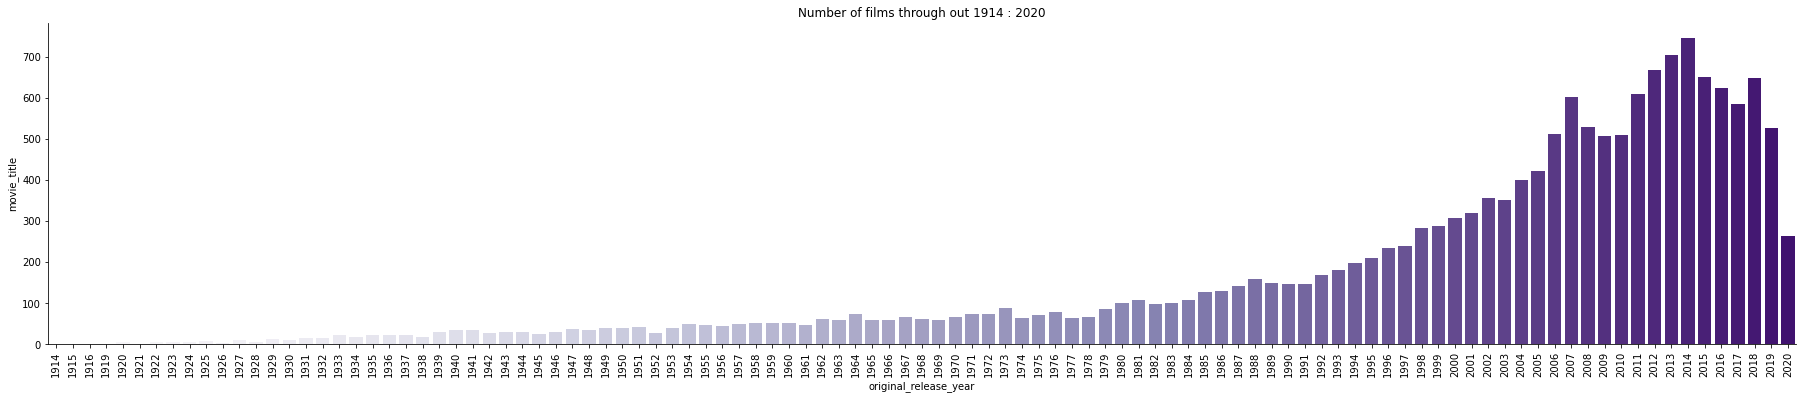

In [24]:
tmp = film.groupby('original_release_year').agg({'movie_title':'count'}).reset_index()

a=tmp[~(tmp['original_release_year'] == 'nan')]['original_release_year'].astype(int).min()
b=tmp[~(tmp['original_release_year'] == 'nan')]['original_release_year'].astype(int).max()

sns.catplot(data=tmp[~(tmp['original_release_year'] == 'nan')], kind='bar', x='original_release_year', y='movie_title', aspect=5, palette='Purples')
plt.xticks(rotation=90)
plt.title(f"Number of films through out {a} : {b}")

# print(f'''Earliest Year: {tmp[~(tmp['original_release_year'] == 'nan')]['original_release_year'].astype(int).min()}
# Latest Year: {tmp[~(tmp['original_release_year'] == 'nan')]['original_release_year'].astype(int).max()}''')

## Which month film got released the most?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

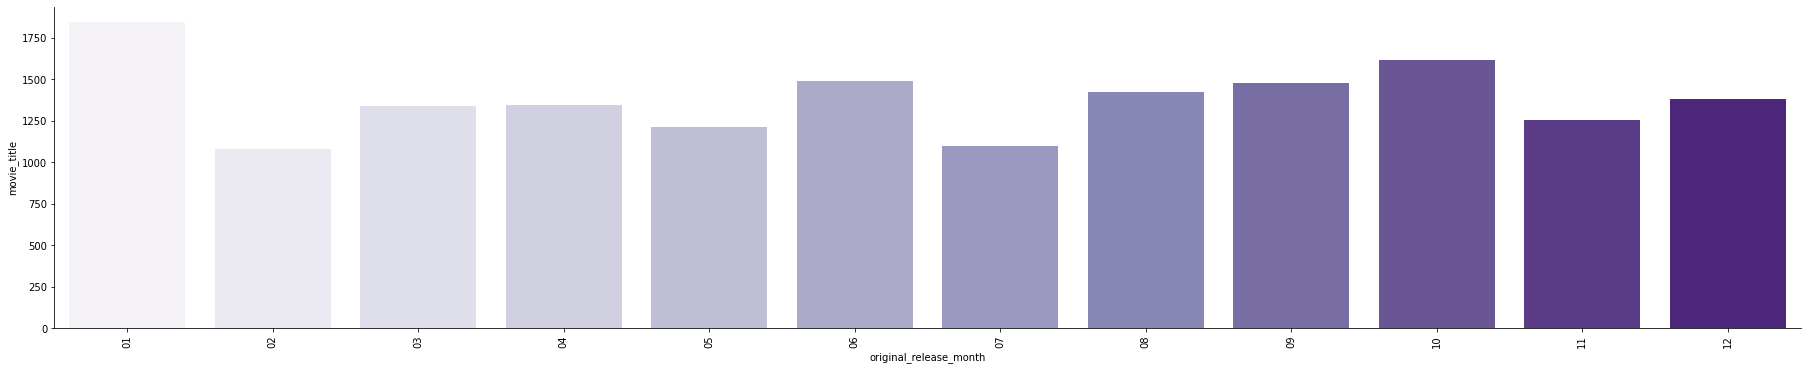

In [25]:
tmp = film.groupby('original_release_month').agg({'movie_title':'count'}).reset_index()
sns.catplot(data=tmp[~((tmp['original_release_month'] == 'nan') | (tmp['original_release_month'] == ''))], kind='bar', x='original_release_month', y='movie_title', aspect=5, palette='Purples')
plt.xticks(rotation=90)

## Which day of month film get released the most?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text major ticklabel objects>)

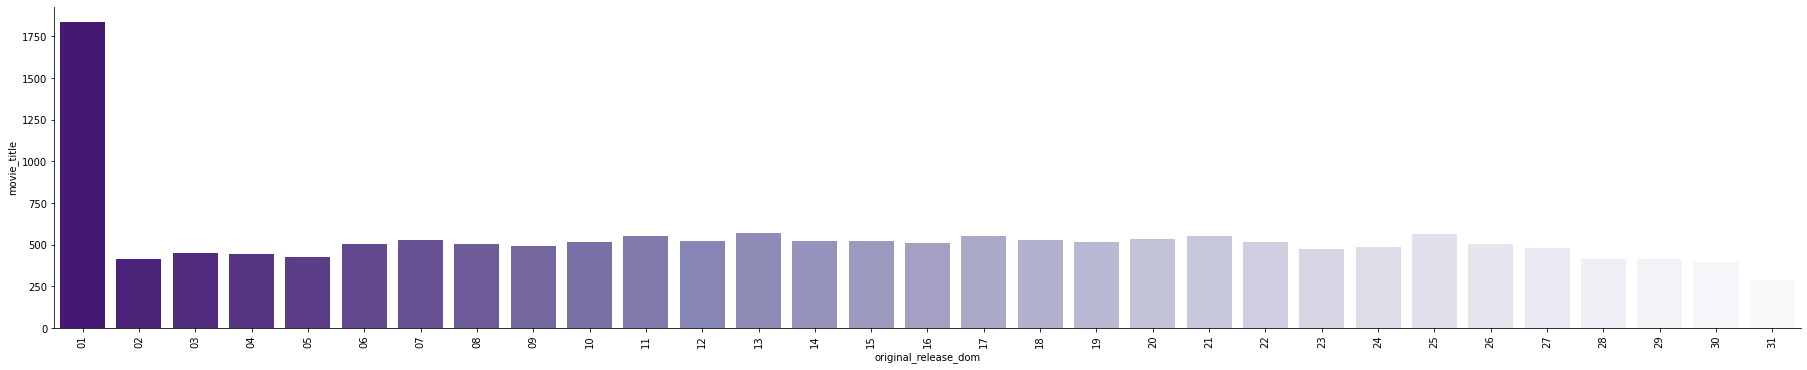

In [26]:
tmp = film.groupby('original_release_dom').agg({'movie_title':'count'}).reset_index()
sns.catplot(data=tmp[~((tmp['original_release_dom'] == 'nan') | (tmp['original_release_dom'] == ''))], kind='bar', x='original_release_dom', y='movie_title', aspect=5, palette='Purples_r')
plt.xticks(rotation=90)

## Which film's genre are the most used ?

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

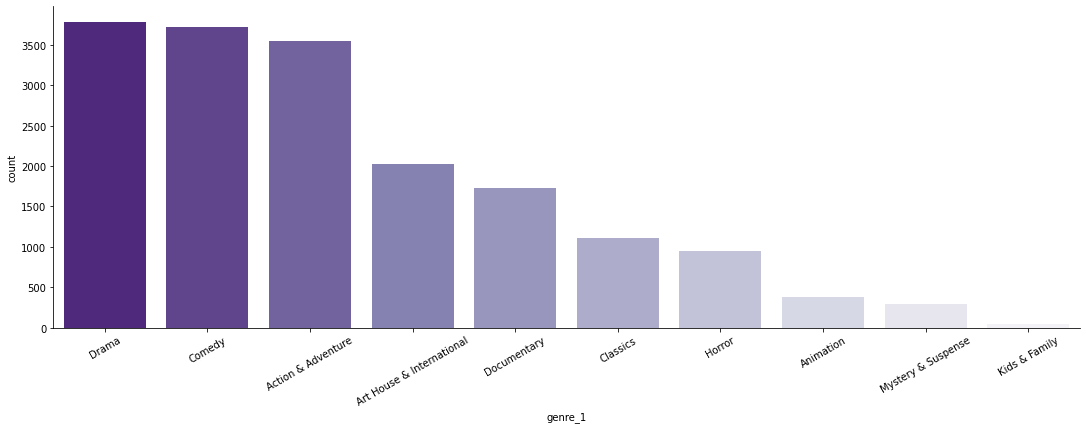

In [27]:
sns.catplot(kind='count', data=film, x='genre_1', aspect=3, order=film['genre_1'].value_counts().iloc[:10].index, palette='Purples_r')
plt.xticks(rotation=30)

## Trend of Genre

Text(0.5, 1.0, 'Trend of Genre through out 1914 : 2020')

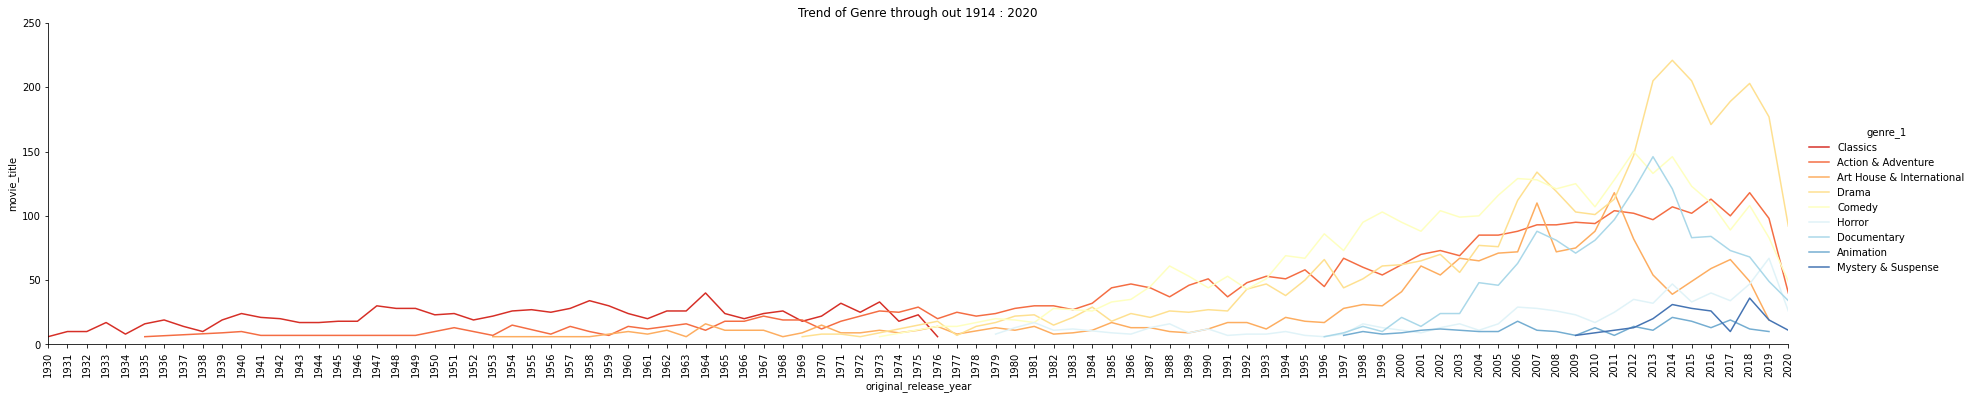

In [28]:
tmp = film.groupby(['original_release_year', 'genre_1']).agg({'movie_title':'count'}).reset_index()

sns.relplot(data=tmp[~(tmp['original_release_year'] == 'nan') & (tmp['movie_title'] > 5) & (tmp[~(tmp['original_release_year'] == 'nan')]['original_release_year'].astype(int) > 5)]
            , kind='line', x='original_release_year', y='movie_title'
            , aspect=5, palette='RdYlBu'
           , hue='genre_1')
plt.xticks(rotation=90)
plt.axis(['1930','2020',0,250])
plt.title(f'Trend of Genre through out {a} : {b}')

## How Month of release affect film's genre ?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

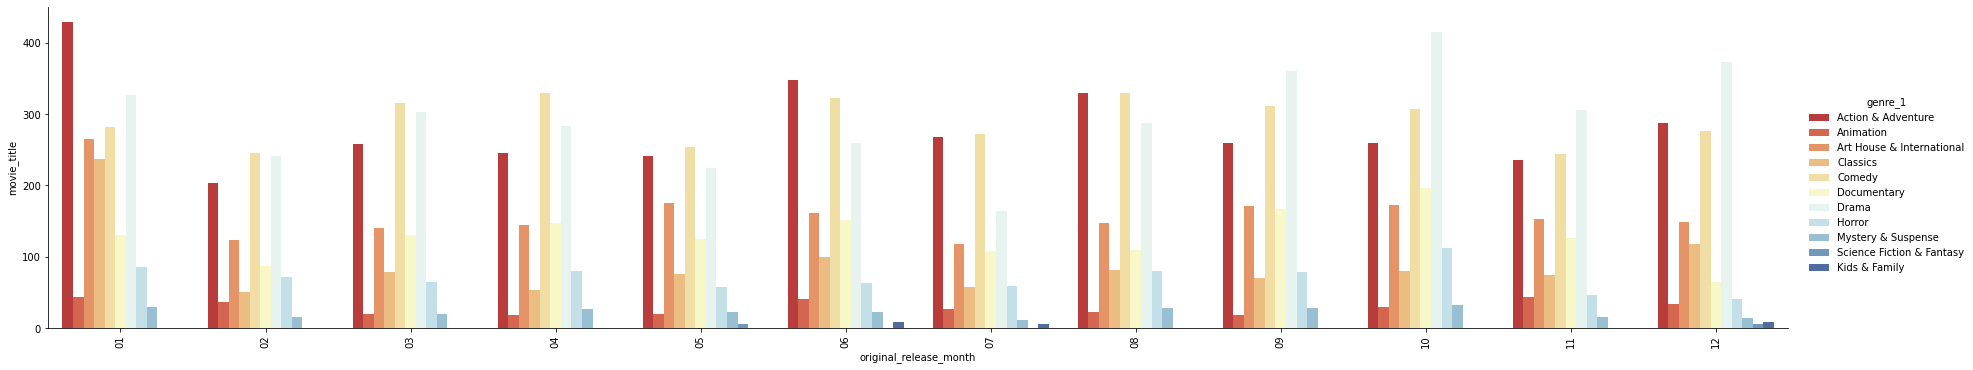

In [29]:
tmp = film.groupby(['original_release_month', 'genre_1']).agg({'movie_title':'count'}).reset_index()
sns.catplot(data=tmp[~((tmp['original_release_month'] == 'nan') | (tmp['original_release_month'] == '')) & (tmp['movie_title'] > 5)], kind='bar', x='original_release_month', y='movie_title'
            , aspect=5, palette='RdYlBu'
            , hue='genre_1')
plt.xticks(rotation=90)

In [30]:
# tmp = film.groupby(['original_release_month', 'genre_1']).agg({'movie_title':'count'}).reset_index()
# sns.catplot(data=tmp[~((tmp['original_release_month'] == 'nan') | (tmp['original_release_month'] == '')) & (tmp['movie_title'] > 5)], kind='bar', x='original_release_month', y='movie_title'
#             , height = 7.5, aspect=2, palette='RdYlBu'
#             , row='genre_1')
# plt.xticks(rotation=0)
# plt.legend()

ValueError: ignored

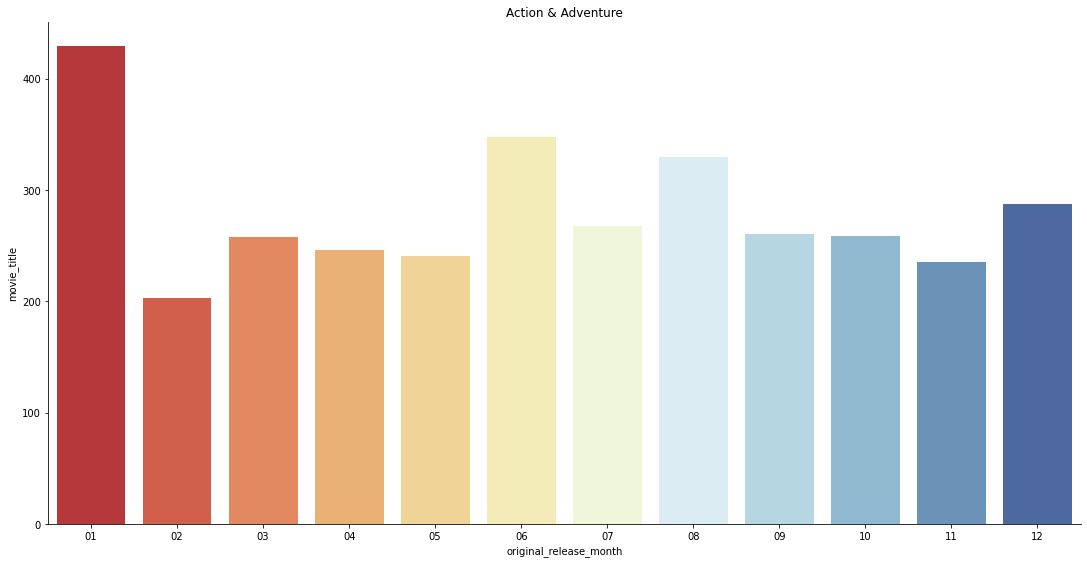

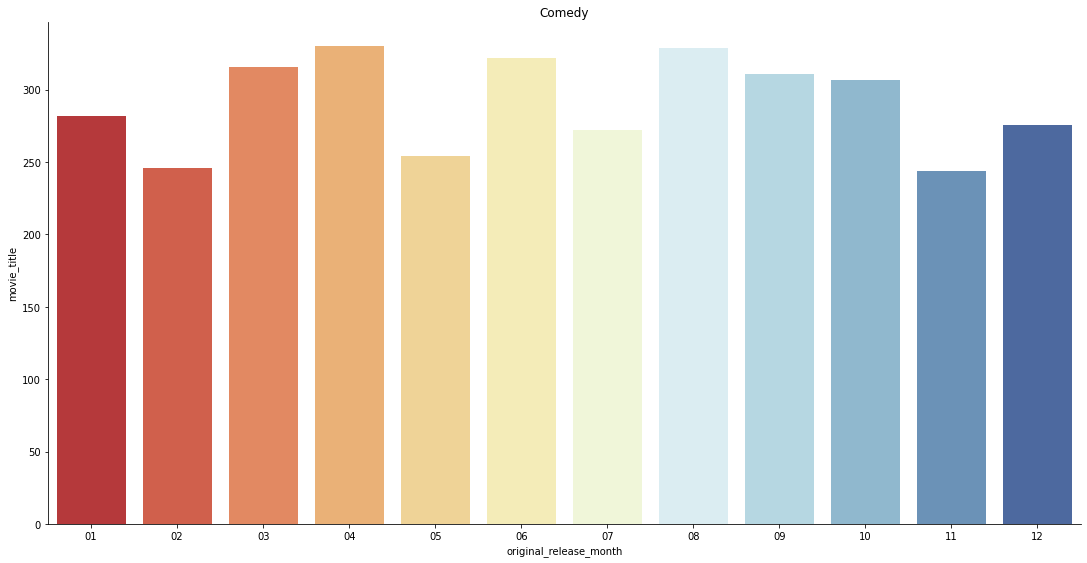

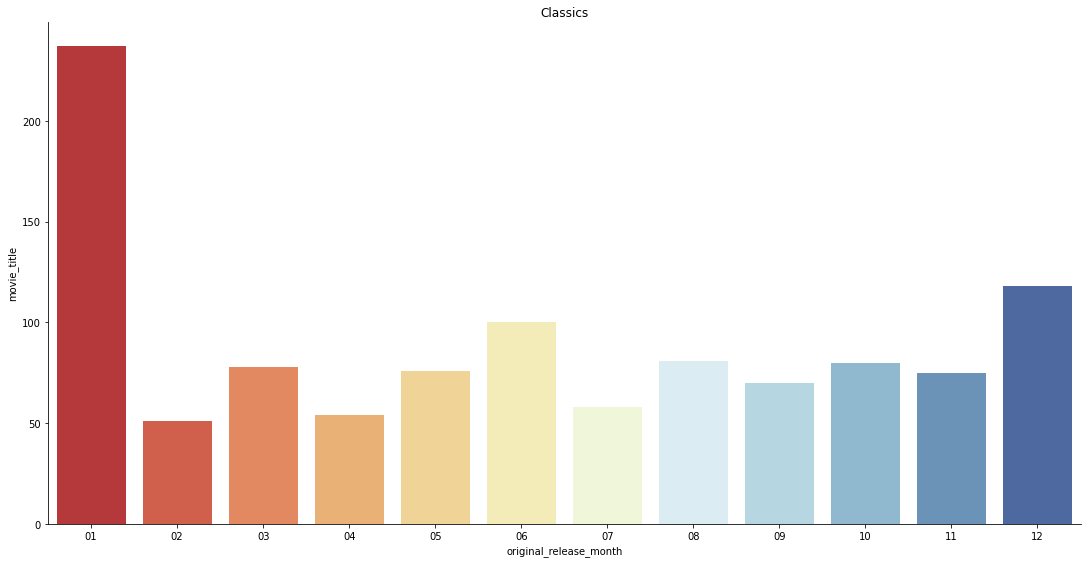

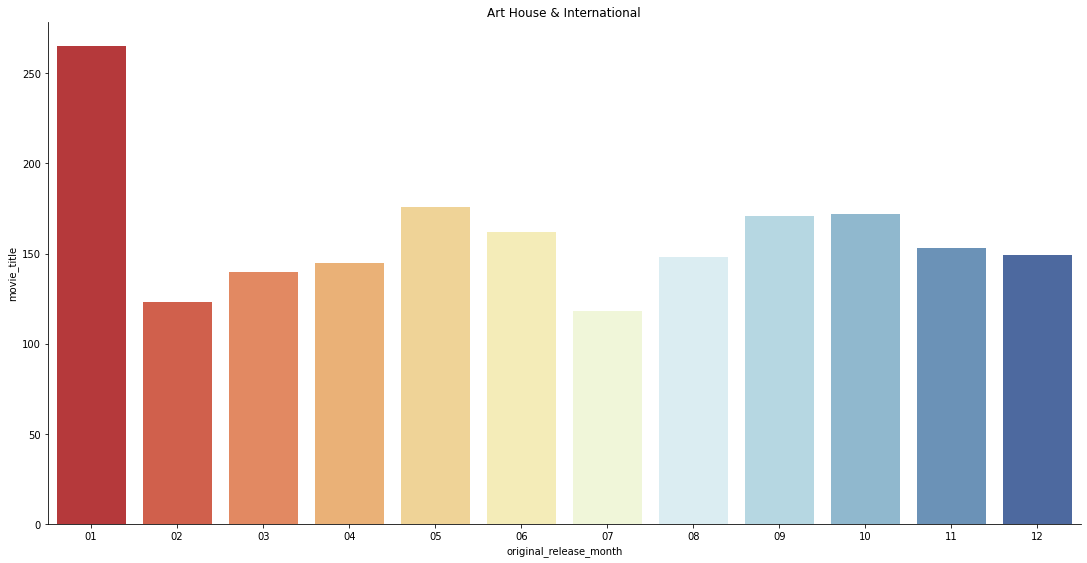

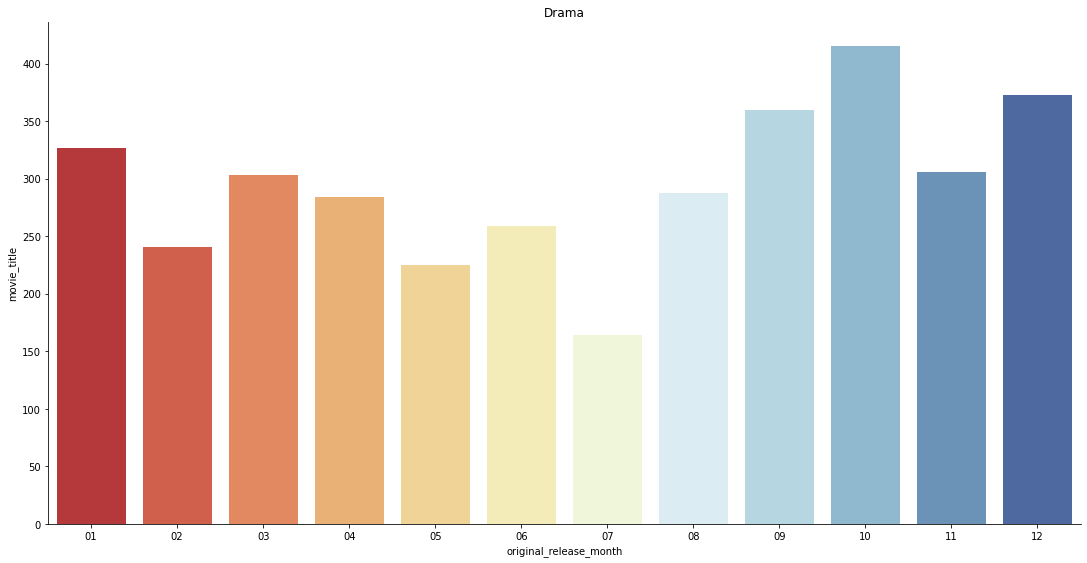

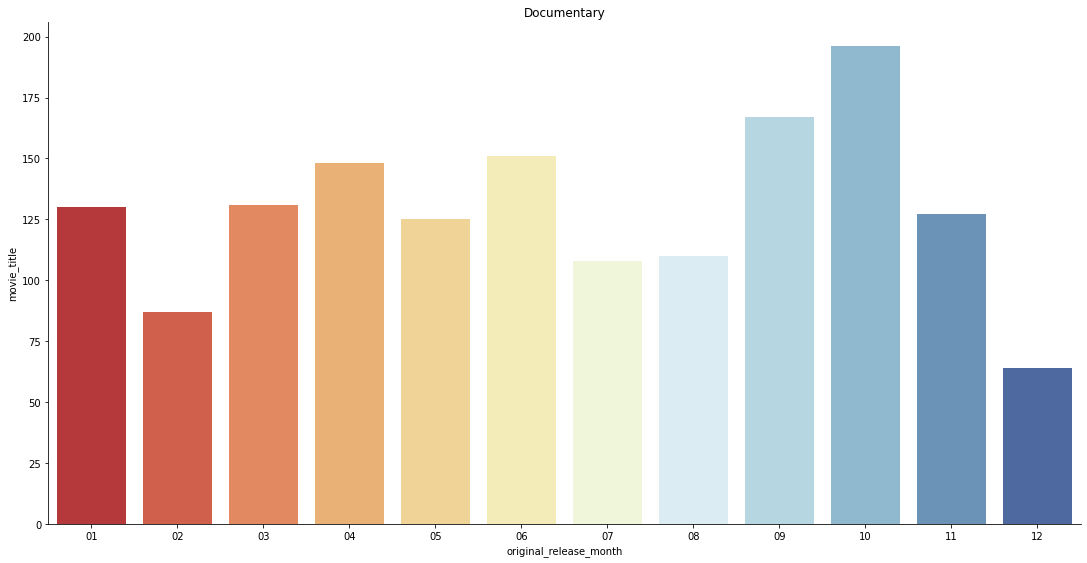

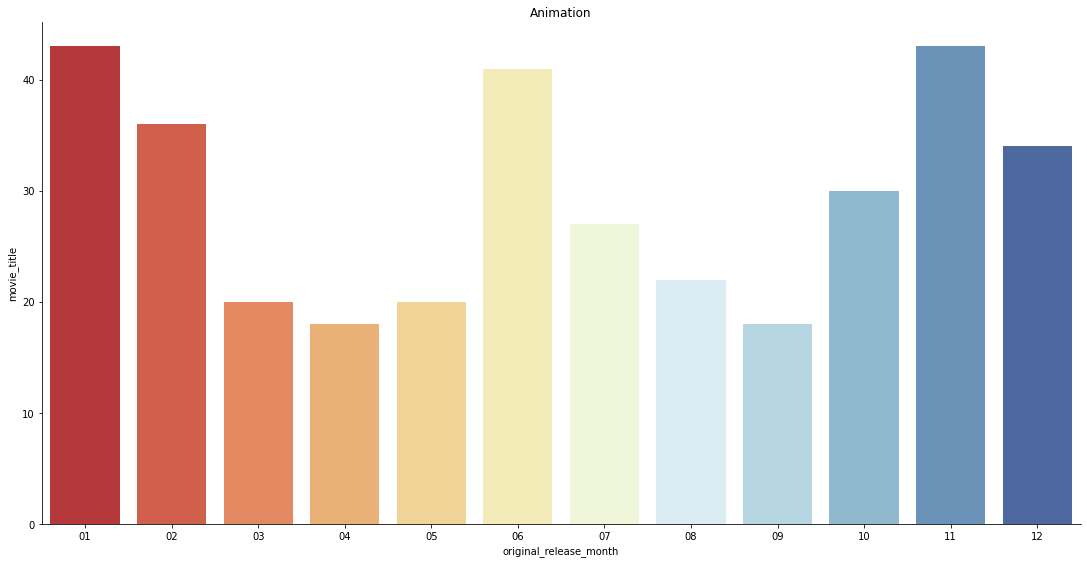

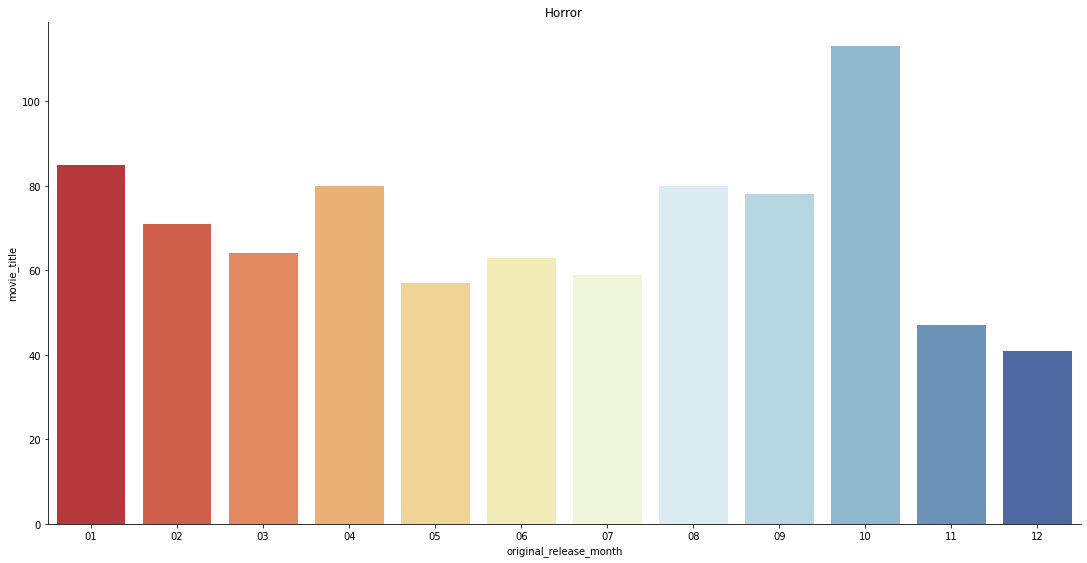

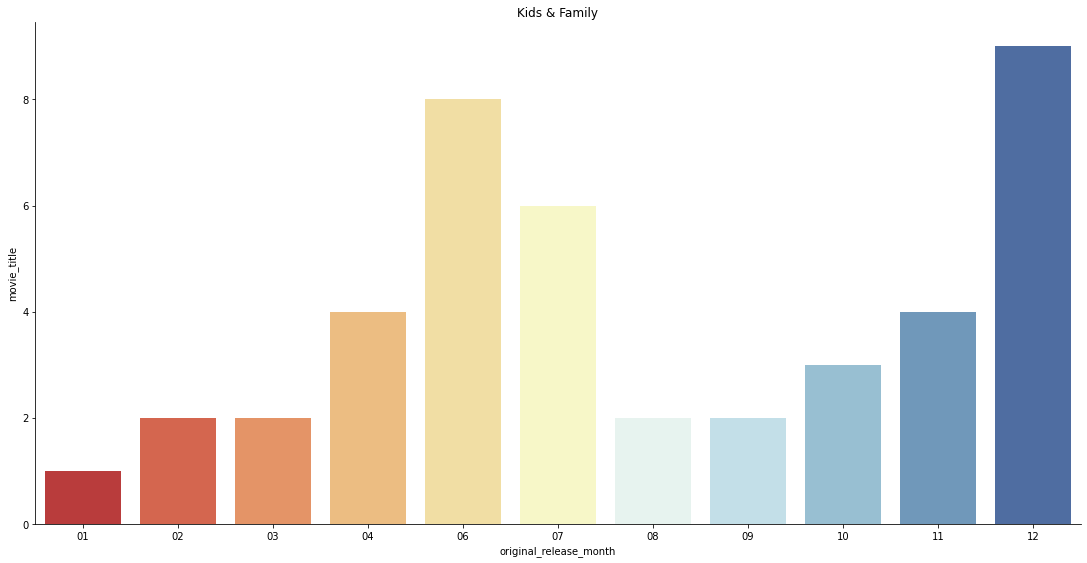

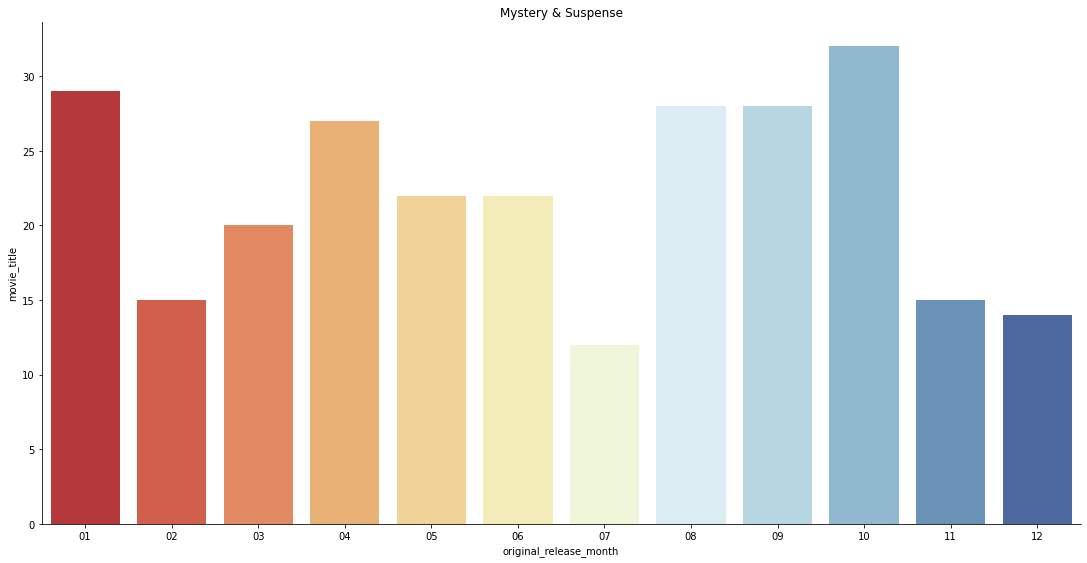

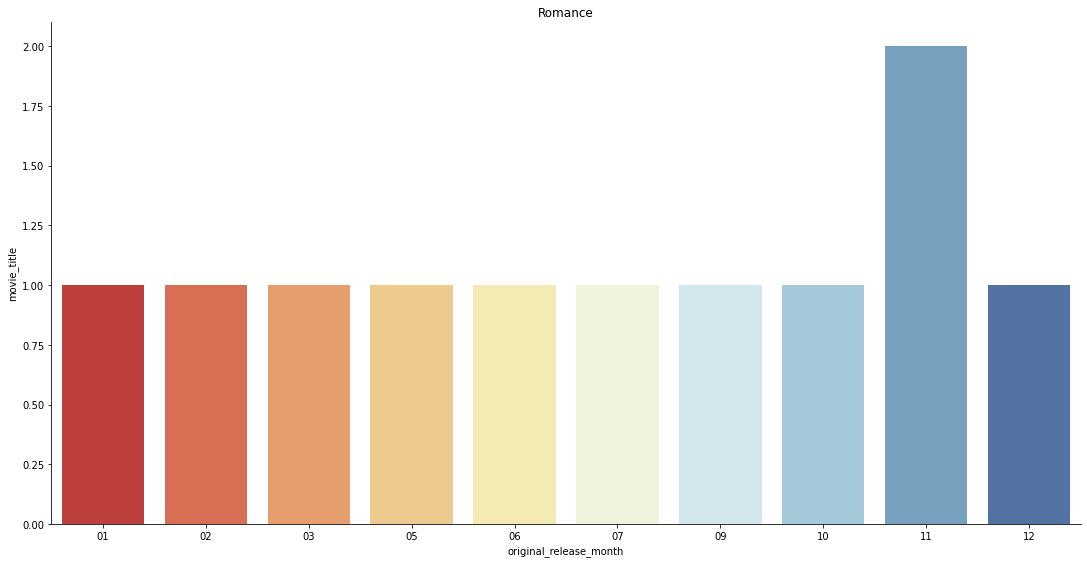

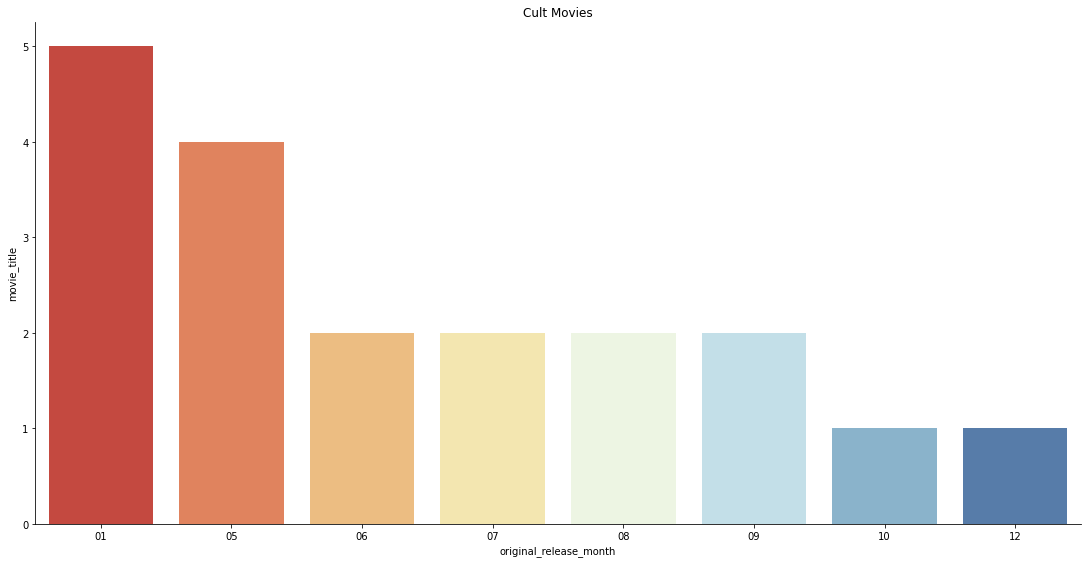

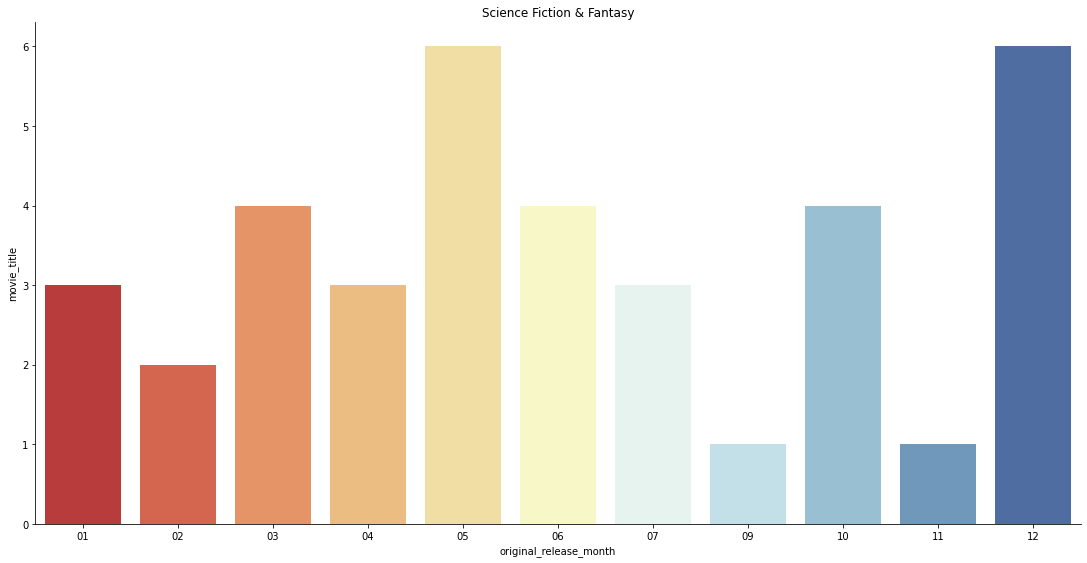

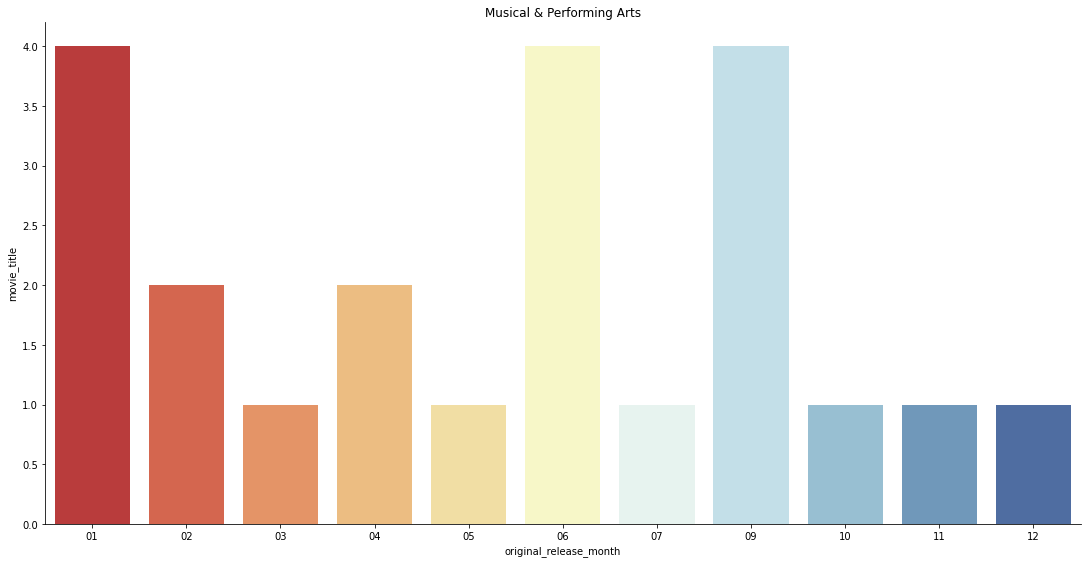

In [32]:
from matplotlib import rcParams as rcp
rcp.update({'figure.max_open_warning': 0})
tmp = film.groupby(['original_release_month', 'genre_1']).agg({'movie_title':'count'}).reset_index()

for i in film['genre_1'].unique():
    sns.catplot(data=tmp[~((tmp['original_release_month'] == 'nan') | (tmp['original_release_month'] == '')) & (tmp['genre_1'] == i)], kind='bar', x='original_release_month', y='movie_title'
            , height=7.5, aspect=2, palette='RdYlBu')
    plt.xticks(rotation=0)
    plt.title(i)

## Interesting Keywords

Defining Function for further use

In [33]:
def keyword_month(keyword, col,  regex=True, aspect=3):
    df = film[film[str(col)].str.contains(keyword, regex=regex).fillna(False)].groupby('original_release_month').agg({"movie_title":"count"}).reset_index()
    df_c = df[~(df['original_release_month'] == '')]
    sns.catplot(data=df_c, kind='bar', x='original_release_month', y='movie_title'
            , aspect=aspect
            , palette='RdYlBu'
           )
    plt.xticks(rotation=0)
    plt.title(f'Number of films contain this keyword: "{keyword}" by Month of release')

In [34]:
def keyword_trend(keyword, col,  regex=True, aspect=3):
    tick = np.arange(1914, 2021, step=1)
    df = film[film[str(col)].str.contains(keyword, regex=regex).fillna(False)].groupby(['original_release_year']).agg({"movie_title":"count"}).reset_index()
    df_c = df[~((df['original_release_year'] == '') | (df['original_release_year'] == 'nan'))]
    sns.catplot(data=df_c, kind='bar', x='original_release_year', y='movie_title'
            , aspect=aspect
            , palette='Purples'
           )
    plt.title(f'Trend of films contain this keyword: "{keyword}" through out {a} : {b}')

In [35]:
def keyword_rotten(keyword, col, regex=True, aspect=3):
    df = film[film[str(col)].str.contains(keyword, regex=regex).fillna(False)].groupby('tomatometer_status').agg({"movie_title":"count"}).reset_index()
    df_c = df[~(df['tomatometer_status'] == '')]
    sns.catplot(data=df_c, kind='bar'
                , x='tomatometer_status', y='movie_title'
                , aspect=aspect
                , palette='RdYlGn'
               )
    plt.xticks(rotation=0)
#     plt.title(f'Number of films contain this keyword: "{keyword}" by Month of release')

## Christmas movie release more on December ?

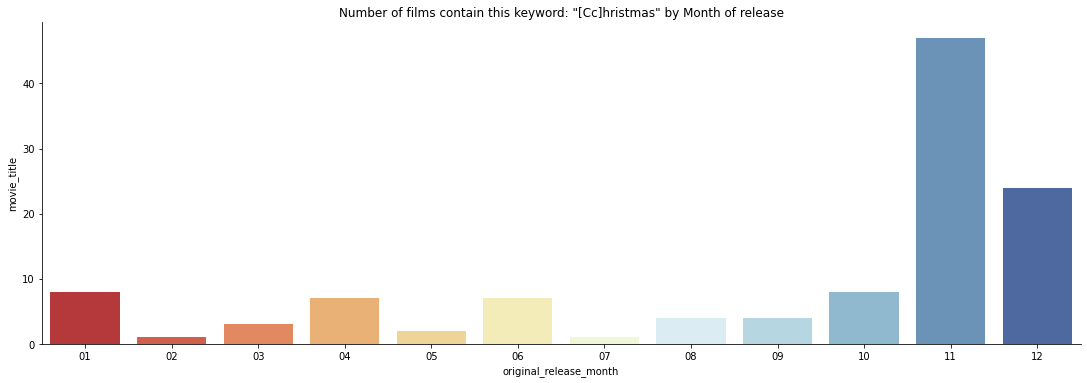

In [36]:
keyword_month('[Cc]hristmas', 'movie_info')

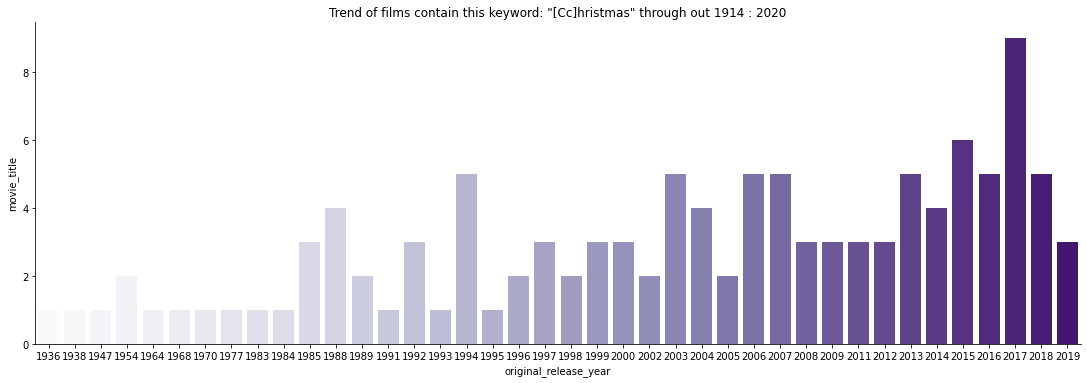

In [37]:
keyword_trend('[Cc]hristmas', 'movie_info')

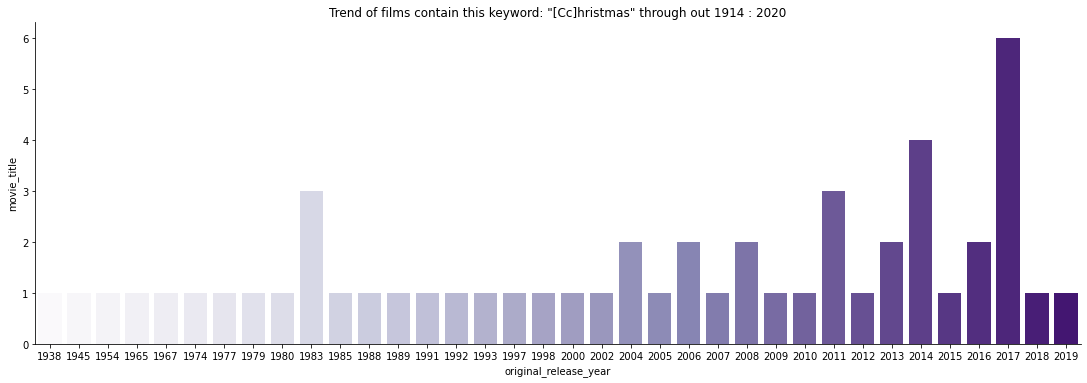

In [38]:
keyword_trend('[Cc]hristmas', 'movie_title')

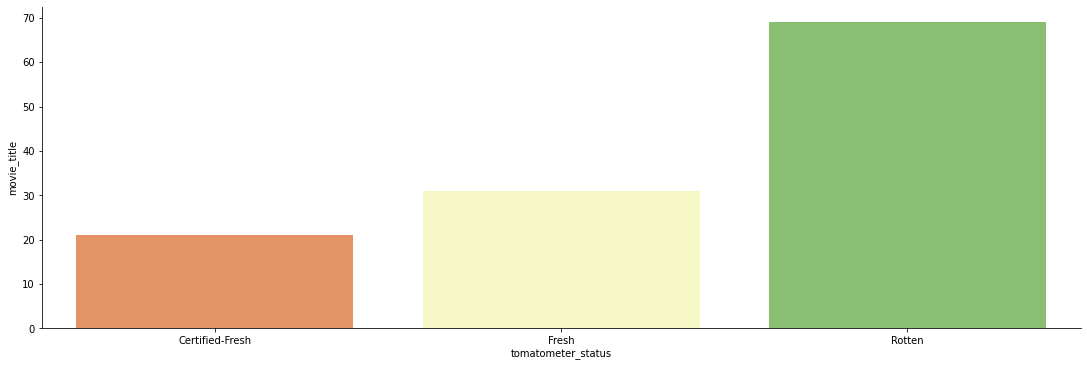

In [39]:
keyword_rotten('[Cc]hristmas', 'movie_info')

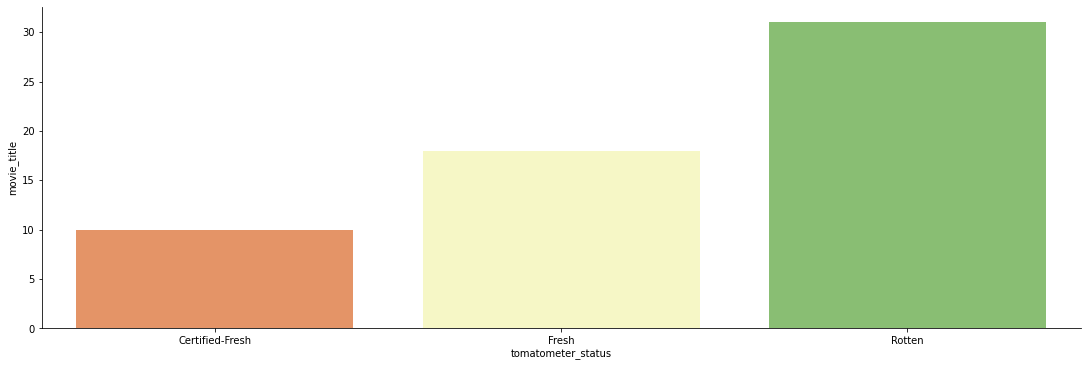

In [40]:
keyword_rotten('[Cc]hristmas', 'movie_title')

## LGBTQ Films

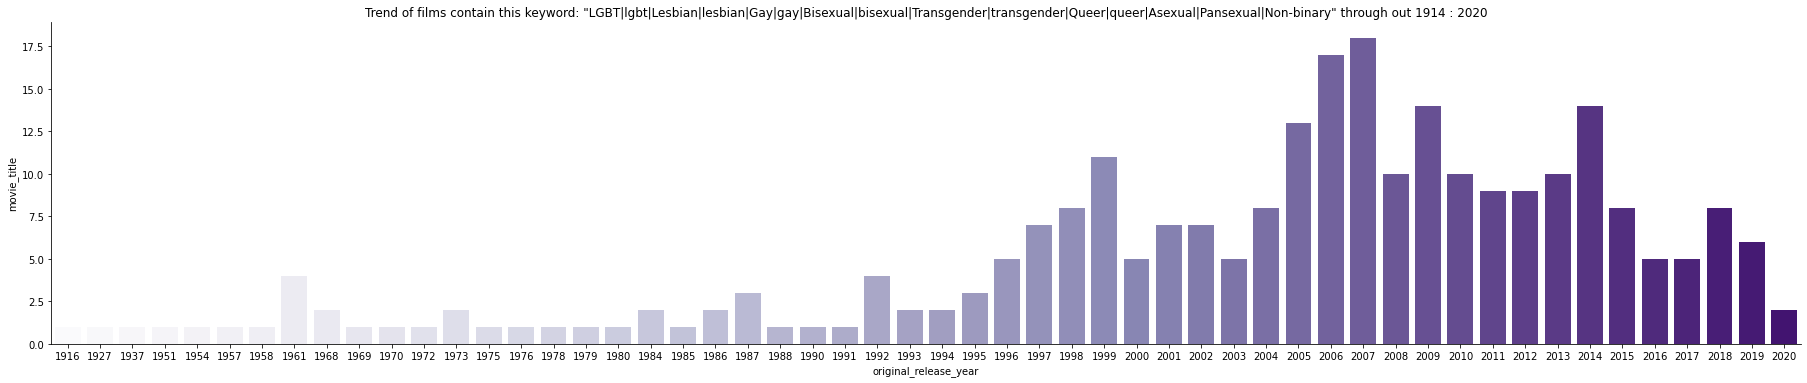

In [41]:
keyword_trend(r'LGBT|lgbt|Lesbian|lesbian|Gay|gay|Bisexual|bisexual|Transgender|transgender|Queer|queer|Asexual|Pansexual|Non-binary', 'movie_info',aspect=5)

## Harry Potter movie

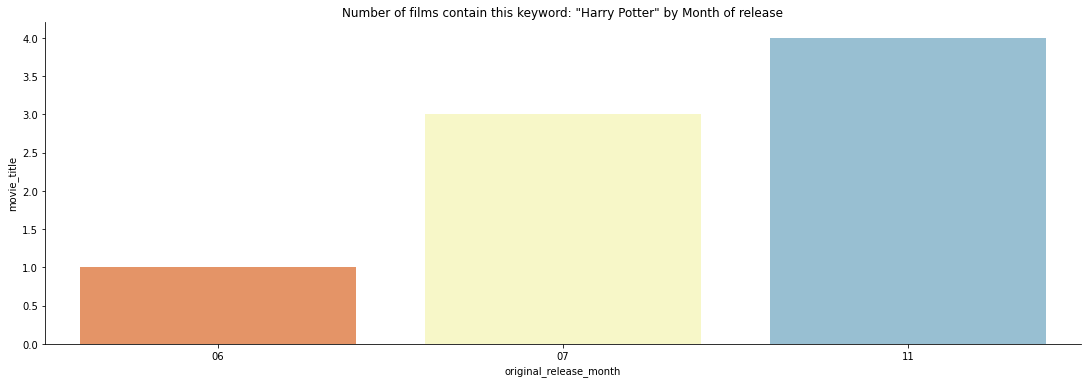

In [42]:
keyword_month('Harry Potter', 'movie_title')

Harry Potter films are likely to get released on November

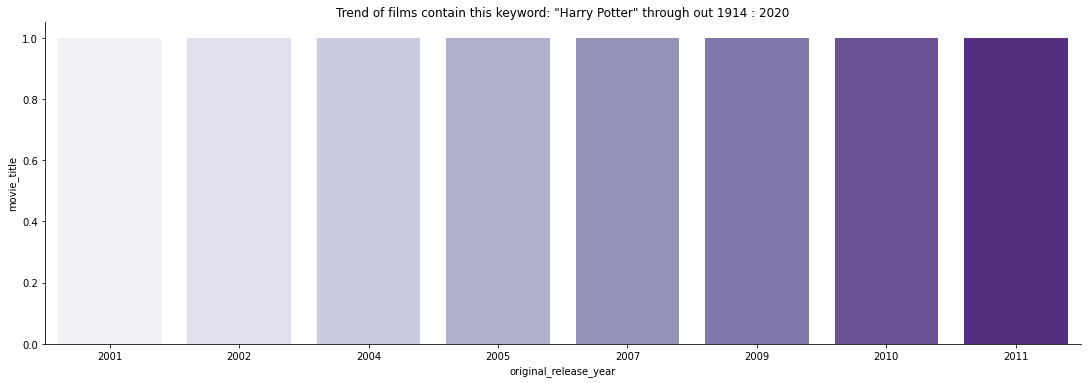

In [43]:
keyword_trend('Harry Potter', 'movie_title')

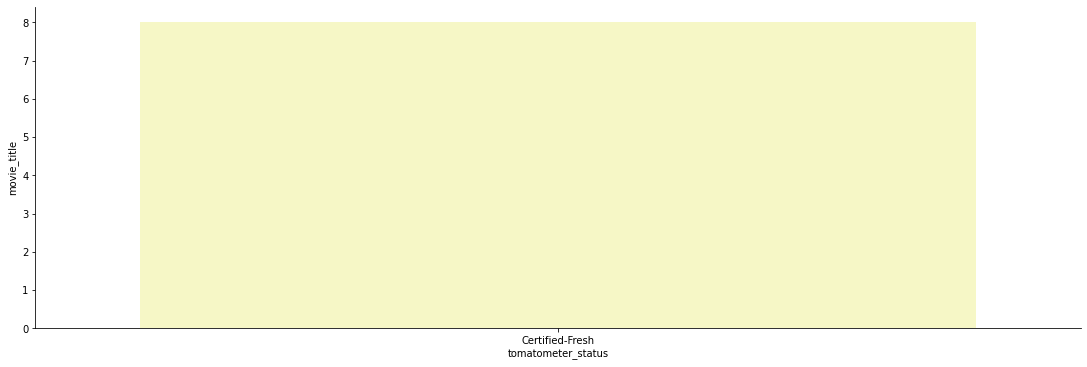

In [44]:
keyword_rotten('Harry Potter', 'movie_title')

## Star Wars

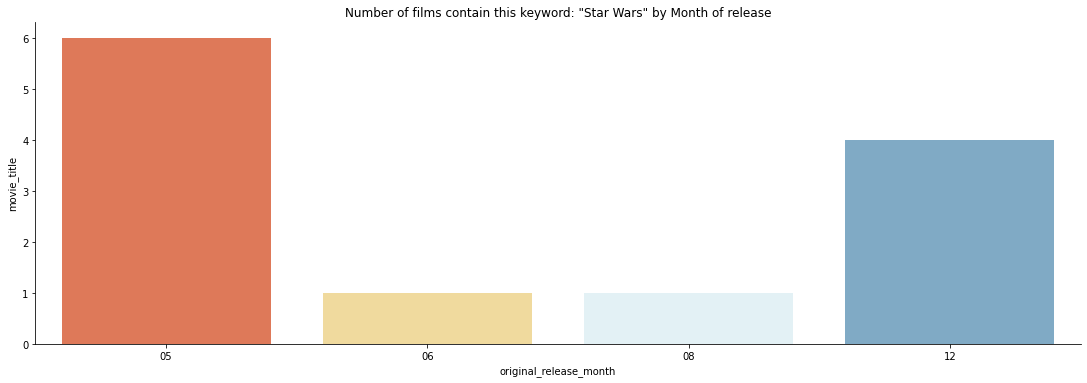

In [45]:
keyword_month('Star Wars', 'movie_title')

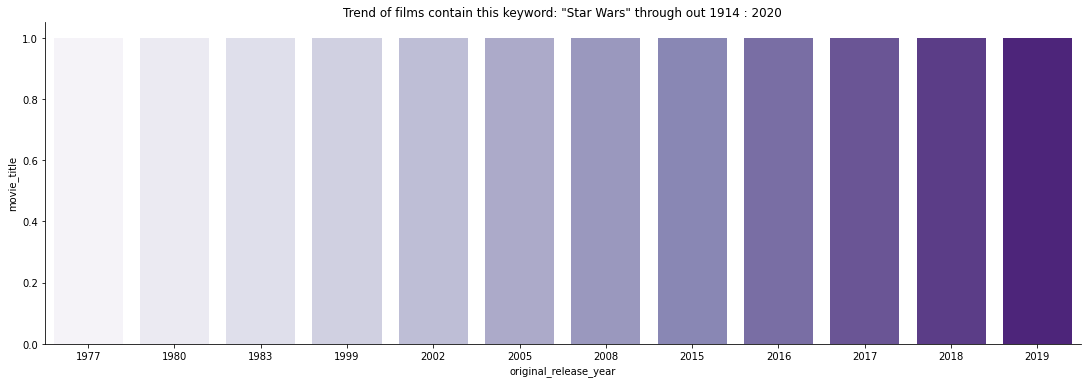

In [46]:
keyword_trend('Star Wars', 'movie_title')

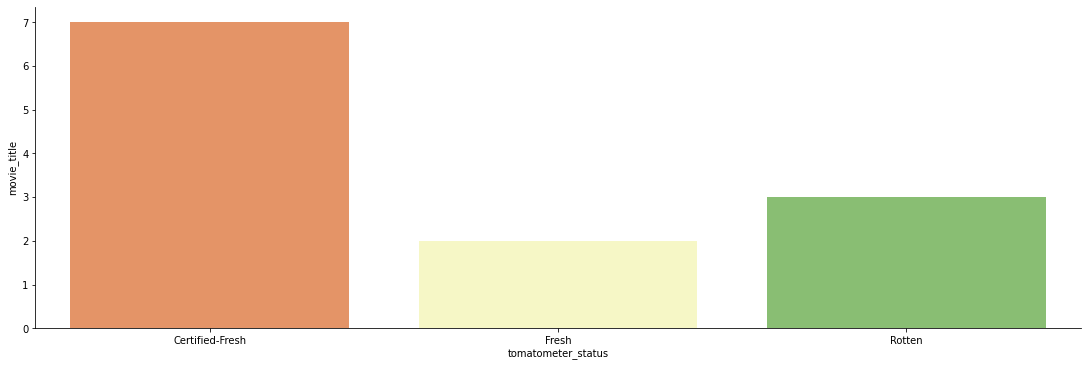

In [47]:
keyword_rotten('Star Wars', 'movie_title')